# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root"); 
//TFile *file = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/jetReco/Dataset/Part5.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will explore two jet types: "Reco" (reconstructed from the calorimeter) and "Truth"(particle level). Activate "Event Weight". 

In [4]:
float evtw = -1;
UInt_t npv = -1;
float mu = -1;

vector<float> *reco_R4_pt;
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;
vector<float> *reco_R4_jvf;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;
vector<float> *truth_R4_pt;

vector<float> *track_R4_eta;
vector<float> *track_R4_phi;
vector<float> *track_R4_m;
vector<float> *track_R4_pt;

vector<float> *reco_R10_pt;
vector<float> *reco_R10_eta;
vector<float> *reco_R10_phi;
vector<float> *reco_R10_m;
vector<float> *reco_R10_jvf;

vector<float> *truth_R10_eta;
vector<float> *truth_R10_phi;
vector<float> *truth_R10_m;
vector<float> *truth_R10_pt;

vector<float> *reco_R10Trim_pt;
vector<float> *reco_R10Trim_eta;
vector<float> *reco_R10Trim_phi;
vector<float> *reco_R10Trim_m;
vector<float> *reco_R10Trim_jvf;

vector<float> *truth_R10Trim_eta;
vector<float> *truth_R10Trim_phi;
vector<float> *truth_R10Trim_m;
vector<float> *truth_R10Trim_pt;


tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("NPV", &npv);
tree->SetBranchAddress("mu_average", &mu);

tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);

tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt);
tree->SetBranchAddress("RecoJets_R10_eta", &reco_R10_eta);
tree->SetBranchAddress("RecoJets_R10_phi", &reco_R10_phi);
tree->SetBranchAddress("RecoJets_R10_m", &reco_R10_m);

tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt);
tree->SetBranchAddress("TruthJets_R10_eta", &truth_R10_eta);
tree->SetBranchAddress("TruthJets_R10_phi", &truth_R10_phi);
tree->SetBranchAddress("TruthJets_R10_m", &truth_R10_m);

tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_R10Trim_pt);
tree->SetBranchAddress("RecoJets_R10_Trimmed_eta", &reco_R10Trim_eta);
tree->SetBranchAddress("RecoJets_R10_Trimmed_phi", &reco_R10Trim_phi);
tree->SetBranchAddress("RecoJets_R10_Trimmed_m", &reco_R10Trim_m);

tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &truth_R10Trim_pt);
tree->SetBranchAddress("TruthJets_R10_Trimmed_eta", &truth_R10Trim_eta);
tree->SetBranchAddress("TruthJets_R10_Trimmed_phi", &truth_R10Trim_phi);
tree->SetBranchAddress("TruthJets_R10_Trimmed_m", &truth_R10Trim_m);


tree->SetBranchAddress("TrackJets_R4_pt", &track_R4_pt);
tree->SetBranchAddress("TrackJets_R4_eta", &track_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &track_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &track_R4_m);

Create Canvas

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Create histograms: Number of jets and leading jet pT 

In [6]:
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtrack_pt = new TH1F("Lead Track-jet","Leading jet pT; pT(GeV);Events",50,10,200);

TH1F *hist_leadreco10_pt = new TH1F("Lead Reco-jet, R=1","Leading jet pT; pT(GeV);Events",50,10,1000);
TH1F *hist_leadtruth10_pt = new TH1F("Lead Truth-jet, R=1","Leading jet pT; pT(GeV);Events",50,10,1000);
TH1F *hist_leadreco10Trim_pt = new TH1F("Lead RecoTrimmed-jet, R=1","Leading jet pT; pT(GeV);Events",50,10,1000);

TH1F *hist_leadreco10_m = new TH1F("Lead Reco-jet, R=1","Leading jet m; m(GeV);Events",50,10,1000);
TH1F *hist_leadtruth10_m = new TH1F("Lead Truth-jet, R=1","Leading jet m; m(GeV);Events",50,10,1000);
TH1F *hist_leadreco10Trim_m = new TH1F("Lead RecoTrimmed-jet, R=1","Leading jet m; m(GeV);Events",50,10,1000);

TH1F *hist_reco_pt = new TH1F("Reco-jet","Reco-jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth-jet","Truth-jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_track_pt = new TH1F("Track-jet","Track-jet pT; pT(GeV);Events",50,10,200);

TH1F *hist_leadrecoJVF_pt = new TH1F("Lead Reco-jet - JVF","Leading jet pT, |JVF|>0.5; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruthJVF_pt = new TH1F("Lead Truth-jet - JVF","Leading jet pT, |JVF|>0.5; pT(GeV);Events",50,10,200);
TH1F *hist_leadtrackJVF_pt = new TH1F("Lead Track-jet - JVF","Leading jet pT, |JVF|>0.5; pT(GeV);Events",50,10,200);

TH1F *hist_recoJVF_pt = new TH1F("Reco-jet - JVF","Reco-jet pT, |JVF|>0.5; pT(GeV);Events",50,10,200);
TH1F *hist_truthJVF_pt = new TH1F("Truth-jet - JVF","Truth-jet pT, |JVF|>0.5; pT(GeV);Events",50,10,200);
TH1F *hist_trackJVF_pt = new TH1F("Track-jet - JVF","Track-jet pT, |JVF|>0.5; pT(GeV);Events",50,10,200);


TH1F *hist_recojets_mult = new TH1F("Number of Reco-jets","Reco-jet multiplicity;N-jets;Events",20,0,20);
TH1F *hist_truthjets_mult = new TH1F("Number of Truth-jets","Truth-jet multiplicity;N-jets;Events",20,0,20);
TH1F *hist_trackjets_mult = new TH1F("Number of Track-jets","Track-jet multiplicity;N-jets;Events",20,0,20);

TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TH2F *hist_jetpt_mu = new TH2F("Reco-jet pT vs. #mu","; #mu; jet pT",80,1,80, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);
TProfile *prof_jetpt_mu = new TProfile("Profile Reco-jet pT vs. #mu",";#mu; jet pT",80,1,80, 0, 200);

TH2F *hist_jetpt10_npv = new TH2F("Reco-jet10 pT vs. NPV",";NPV; jet pT",50,1,50, 50, 10, 200);

TProfile *prof_jetptT_npv = new TProfile("Profile Reco-jetY pT vs. NPV",";NPV; jet pT",50,1,50, 100,300);


TProfile *prof_jetpt10_npv = new TProfile("Profile Reco10-jet pT vs. NPV",";NPV; jet pT",50,1,50, 100, 1000);
TProfile *prof_jetpt10_mu = new TProfile("Profile Reco10-jet pT vs. #mu",";#mu; jet pT",80,1,80, 100, 1000);

TProfile *prof_jetpt10Trim_npv = new TProfile("Profile Reco10Trim-jet pT vs. NPV",";NPV; jet pT",50,1,50, 100, 1000);
TProfile *prof_jetpt10Trim_mu = new TProfile("Profile Reco10Trim-jet pT vs. #mu",";#mu; jet pT",80,1,80, 100, 1000);


TH2F *hist_truthpt_npv = new TH2F("Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TH2F *hist_truthpt_mu = new TH2F("Truth-jet pT vs. #mu","; #mu; jet pT",80,1,80, 20, 0, 200);
TProfile *prof_truthpt_npv = new TProfile("Profile Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);
TProfile *prof_truthpt_mu = new TProfile("Profile Truth-jet pT vs. #mu",";#mu; jet pT",80,1,80, 0, 200);

TH1F *hist_leadreco_jvf = new TH1F("Lead Reco-jet JVF","Leading jet JVF; JVF;Events",20,-1,1);

TH2F *hist_Njet_npv = new TH2F("Reco-jets vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TH2F *hist_Njet_mu = new TH2F("Reco-jets vs. #mu","; #mu; jet pT",80,1,80, 20, 0, 200);
TProfile *prof_Njet_npv = new TProfile("Profile Reco-jets vs. NPV",";NPV; jet pT",50,1,50, 0, 200);
TProfile *prof_Njet_mu = new TProfile("Profile Reco-jets vs. #mu",";#mu; jet pT",80,1,80, 0, 200);

TH2F *hist_Ntruth_npv = new TH2F("Truth-jets vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TH2F *hist_Ntruth_mu = new TH2F("Truth-jets vs. #mu","; #mu; jet pT",80,1,80, 20, 0, 200);
TProfile *prof_Ntruth_npv = new TProfile("Profile Truth-jets vs. NPV",";NPV; jet pT",50,1,50, 0, 200);
TProfile *prof_Ntruth_mu = new TProfile("Profile Truth-jets vs. #mu",";#mu; jet pT",80,1,80, 0, 200);

TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",10,0,1);
TH1F *hist_DR_recoJVF_truth = new TH1F("Delta R reco JVF","Delta R; #Delta R; Events",10,0,1);
TH1F *hist_DR_track_truth = new TH1F("Delta R track","Delta R; #Delta R; Events",10,0,1);

TH1F *hist_response_reco20 = new TH1F("Response-reco-20GeV","Response; Jet response; Events",200,0,2);
TH1F *hist_response_reco100 = new TH1F("Response-reco-100GeV","Response; Jet response; Events",200,0,2);
TH1F *hist_response_reco1000 = new TH1F("Response-reco-1000GeV","Response; Jet response; Events",200,0,2);

TH1F *hist_response_track20 = new TH1F("Response-track-20GeV","Response; Track-Jet response; Events",200,0,2);
TH1F *hist_response_track100 = new TH1F("Response-track-100GeV","Response; Track-Jet response; Events",200,0,2);
TH1F *hist_response_track1000 = new TH1F("Response-track-1000GeV","Response; Track-Jet response; Events",200,0,2);



Warning in <TFile::Append>: Replacing existing TH1: Lead Reco-jet, R=1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead Truth-jet, R=1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lead RecoTrimmed-jet, R=1 (Potential memory leak).


Loop and fill histograms

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    
    if(reco_R10_pt->size()!=0){ 
        hist_leadreco10_pt->Fill(reco_R10_pt->at(0)/1000.,evtw);  
        hist_leadreco10Trim_pt->Fill(reco_R10Trim_pt->at(0)/1000.,evtw);
        hist_leadreco10_m->Fill(reco_R10_m->at(0)/1000.,evtw);  
        hist_leadreco10Trim_m->Fill(reco_R10Trim_m->at(0)/1000.,evtw);
        
        //for(int j=0; j<reco_R10_pt->size(); j++){
        //    std::cout<<reco_R10_pt->at(0)/1000.<<std::endl;
           hist_jetpt10_npv->Fill(reco_R10_pt->at(0)/1000.,npv,evtw);
             prof_jetptT_npv->Fill(reco_R10_pt->at(0)/1000.,npv,evtw);
          // }
        prof_jetpt10_mu->Fill(reco_R10_pt->at(0)/1000.,mu,evtw);
        prof_jetpt10Trim_npv->Fill(reco_R10Trim_pt->at(0)/1000.,npv,evtw);
        prof_jetpt10Trim_mu->Fill(reco_R10Trim_pt->at(0)/1000.,mu,evtw);
         
    }
    if(truth_R10_pt->size()!=0){ 
        hist_leadtruth10_pt->Fill(truth_R10_pt->at(0)/1000.,evtw);  
        hist_leadtruth10_m->Fill(truth_R10_m->at(0)/1000.,evtw);  
    }
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
        hist_recojets_mult->Fill(reco_R4_pt->size(),evtw);
        hist_Njet_npv->Fill(reco_R4_pt->size(),npv,evtw);
        hist_Njet_mu->Fill(reco_R4_pt->size(),mu,evtw);
        prof_Njet_npv->Fill(reco_R4_pt->size(),npv,evtw);
        prof_Njet_mu->Fill(reco_R4_pt->size(),mu,evtw);
        if(reco_R4_jvf->at(0)>0.5) {hist_leadrecoJVF_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);}  
        
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);  
        hist_recoJVF_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);  
        hist_truthjets_mult->Fill(truth_R4_pt->size(),evtw);
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        hist_jetpt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
         }
    }

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
        hist_truthjets_mult->Fill(truth_R4_pt->size(),evtw);
        hist_Ntruth_npv->Fill(truth_R4_pt->size(),npv,evtw);
        hist_Ntruth_mu->Fill(truth_R4_pt->size(),mu,evtw);
        prof_Ntruth_npv->Fill(truth_R4_pt->size(),npv,evtw);
        prof_Ntruth_mu->Fill(truth_R4_pt->size(),mu,evtw);
       
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,evtw);  
        hist_truthpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        hist_truthpt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        prof_truthpt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        prof_truthpt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        }
    }

        if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        TLorentzVector truthJet;
        truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
            if(reco_R4_pt->size()!=0){
            TLorentzVector recoJet;
            recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
            hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
            if(fabs(reco_R4_jvf->at(0))>0.5){hist_DR_recoJVF_truth->Fill(truthJet.DeltaR(recoJet),evtw);}
            if(truthJet.DeltaR(recoJet)<0.3){hist_response_reco20->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
            if(truthJet.DeltaR(recoJet)<0.3 && truth_R4_pt->at(0)>100000.){hist_response_reco100->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
            if(truthJet.DeltaR(recoJet)<0.3 && truth_R4_pt->at(0)>1000000.){hist_response_reco1000->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
            }
            if(track_R4_pt->size()!=0){
            TLorentzVector trackJet;
            trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
            hist_DR_track_truth->Fill(truthJet.DeltaR(trackJet),evtw);
            if(truthJet.DeltaR(trackJet)<0.3){hist_response_track20->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
            if(truthJet.DeltaR(trackJet)<0.3 && truth_R4_pt->at(0)>100000.){hist_response_track100->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
            if(truthJet.DeltaR(trackJet)<0.3 && truth_R4_pt->at(0)>1000000.){hist_response_track1000->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
            }
        }
    
    
    if(track_R4_pt->size()!=0 ){
        hist_leadtrack_pt->Fill(track_R4_pt->at(0)/1000.,evtw);  
        hist_trackjets_mult->Fill(track_R4_pt->size(),evtw);
       
        for(int j=0; j<track_R4_pt->size(); j++){
        hist_track_pt->Fill(track_R4_pt->at(j)/1000.,evtw);  
        }
    }

    
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        
    }

    
    
    
}

std::cout << "Done!" << std::endl;

Done!


<p>Draw</p>

<b>Excercises: 
    1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights
    2. Repeat for all jets pT.

</b>

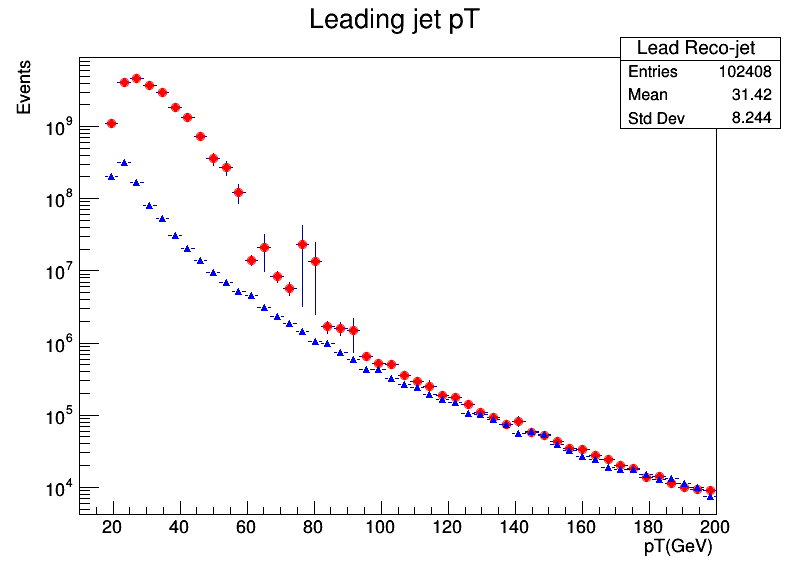

In [8]:
hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw();
hist_leadtruth_pt->SetMarkerStyle(22);
hist_leadtruth_pt->SetMarkerColor(kBlue);
hist_leadtruth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

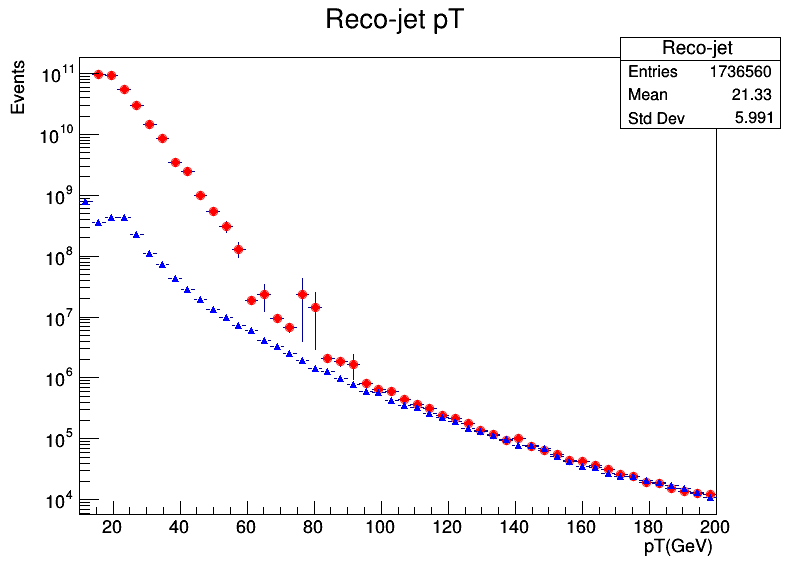

In [9]:
hist_reco_pt->SetMarkerStyle(20);
hist_reco_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw();
hist_truth_pt->SetMarkerStyle(22);
hist_truth_pt->SetMarkerColor(kBlue);
hist_truth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

<b>Excercise: 
3. Make plots for reco and truth jet pT vs. pileup
</b>

In [10]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

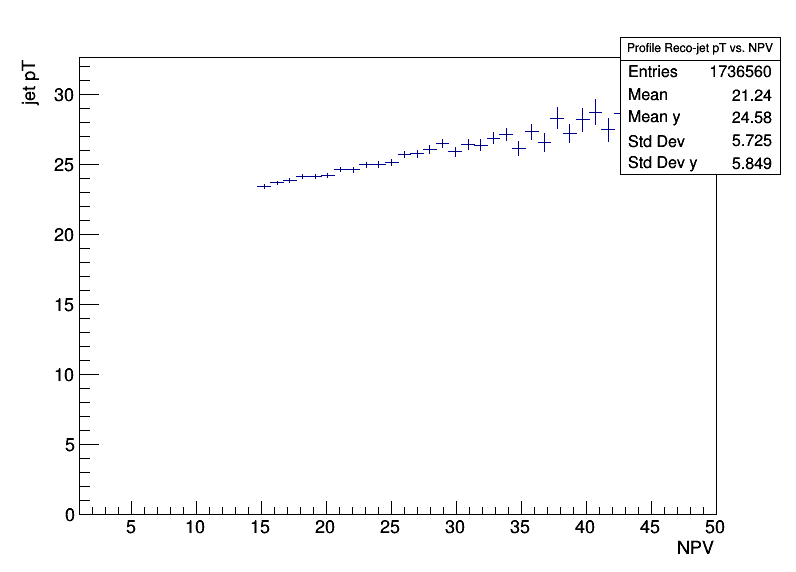

In [11]:
prof_jetpt_npv->Draw("");
canvas2->Draw();

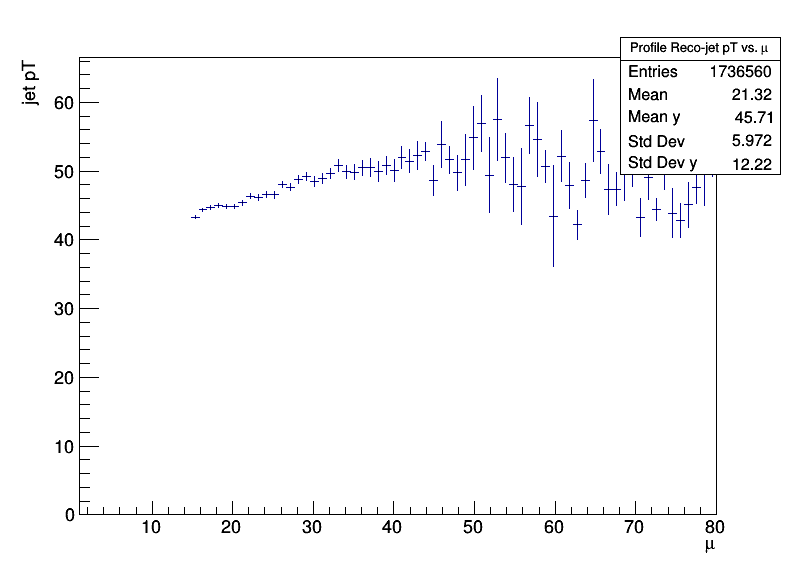

In [12]:
prof_jetpt_mu->Draw("");
canvas2->Draw();

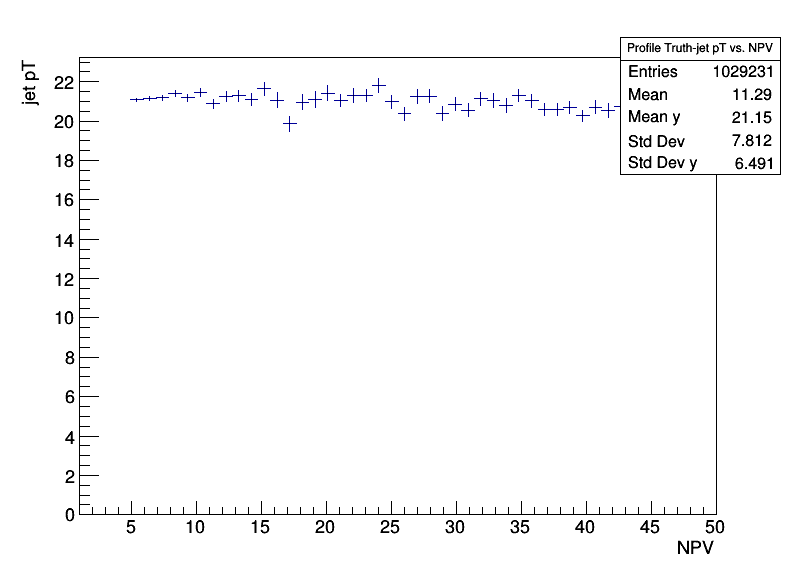

In [13]:
prof_truthpt_npv->Draw("");
canvas2->Draw();

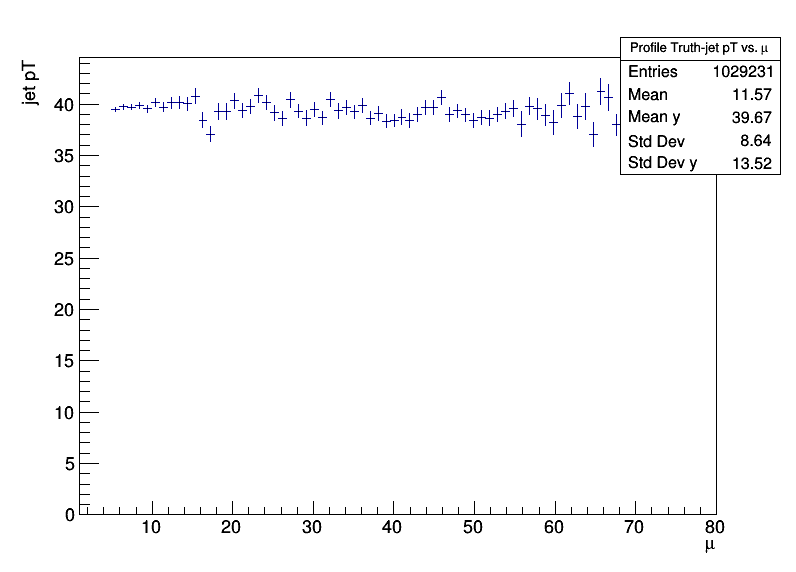

In [14]:
prof_truthpt_mu->Draw("");
canvas2->Draw();

<b>Excercise: 
4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 
5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 
</b>

In [15]:
TCanvas *canvas3 = new TCanvas("Canvas3","",800,600);

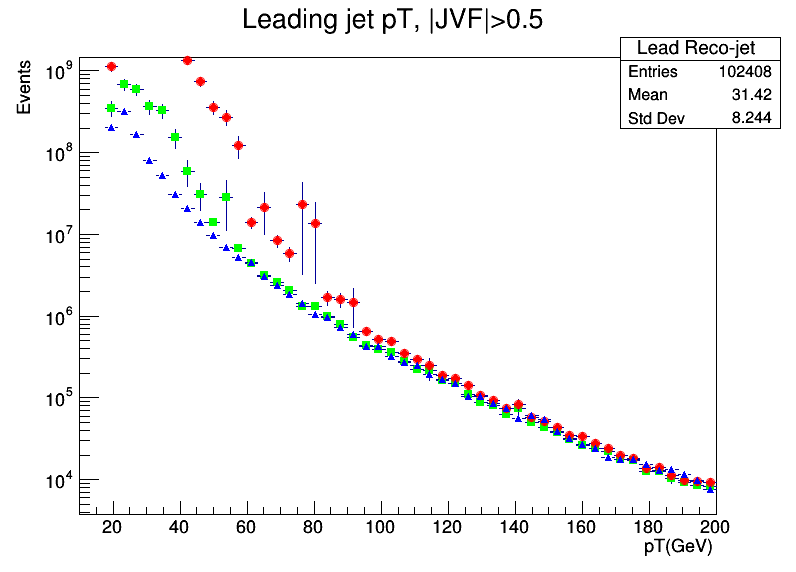

In [16]:
hist_leadrecoJVF_pt->SetMarkerStyle(21);
hist_leadrecoJVF_pt->SetMarkerColor(kGreen);
hist_leadrecoJVF_pt->Draw();
hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("same");
hist_leadtruth_pt->SetMarkerStyle(22);
hist_leadtruth_pt->SetMarkerColor(kBlue);
hist_leadtruth_pt->Draw("same");
canvas3->SetLogy();
canvas3->Draw();

In [17]:
TCanvas *canvas4 = new TCanvas("Canvas4","",800,600);

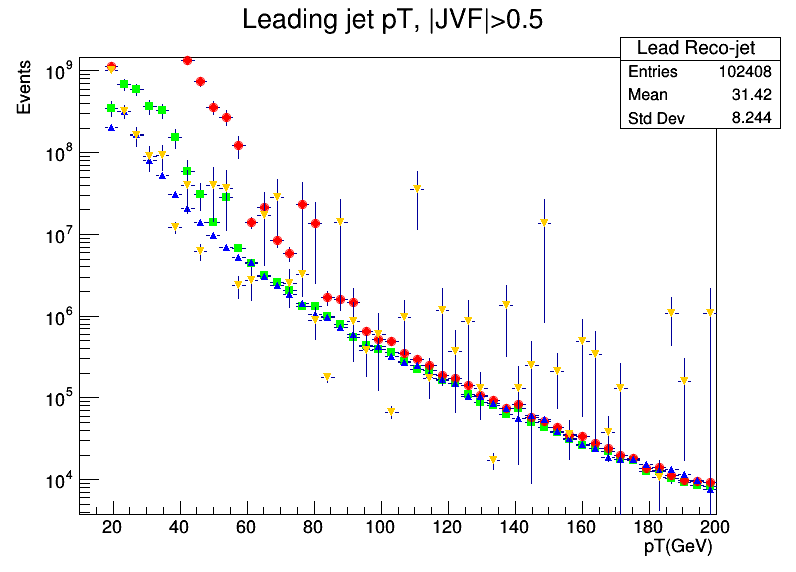

In [18]:
hist_leadrecoJVF_pt->SetMarkerStyle(21);
hist_leadrecoJVF_pt->SetMarkerColor(kGreen);
hist_leadrecoJVF_pt->Draw();
hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("same");
hist_leadtruth_pt->SetMarkerStyle(22);
hist_leadtruth_pt->SetMarkerColor(kBlue);
hist_leadtruth_pt->Draw("same");
hist_leadtrack_pt->SetMarkerStyle(23);
hist_leadtrack_pt->SetMarkerColor(kOrange);
hist_leadtrack_pt->Draw("same");
canvas4->SetLogy();
canvas4->Draw();

Now we will study the jet response: the ratio between the pT of the jet to the truth jet. First we should "match" the jets and the truth jets. We will use the distance DeltaR between the two, but first we should define them as four-vectors:

<b>Excercise: 
6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets 
</b>

In [19]:
TCanvas *canvas5 = new TCanvas("Canvas5","",800,600);

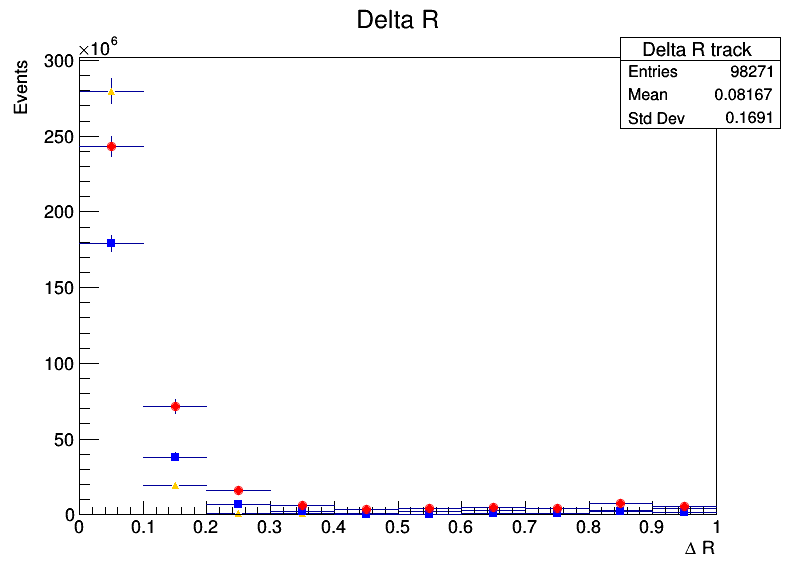

In [20]:
hist_DR_track_truth->SetMarkerStyle(22);
hist_DR_track_truth->SetMarkerColor(kOrange);
hist_DR_track_truth->Draw("");
hist_DR_recoJVF_truth->SetMarkerStyle(21);
hist_DR_recoJVF_truth->SetMarkerColor(kBlue);
hist_DR_recoJVF_truth->Draw("same");
hist_DR_reco_truth->SetMarkerStyle(20);
hist_DR_reco_truth->SetMarkerColor(kRed);
hist_DR_reco_truth->Draw("same");
canvas5->Draw();

<b>Excercise: 
7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).
</b>

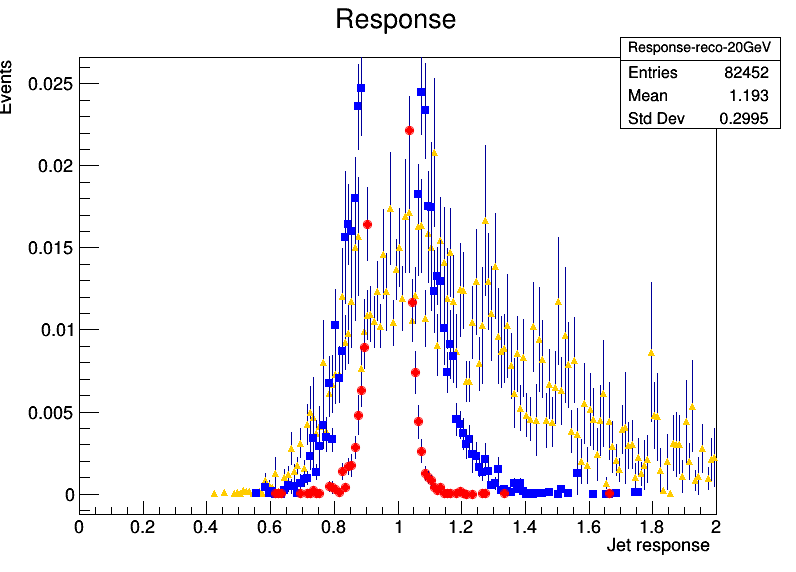

In [21]:
hist_response_reco20->SetMarkerStyle(22);
hist_response_reco20->SetMarkerColor(kOrange);
hist_response_reco20->DrawNormalized("");
hist_response_reco100->SetMarkerStyle(21);
hist_response_reco100->SetMarkerColor(kBlue);
hist_response_reco100->DrawNormalized("same");
hist_response_reco1000->SetMarkerStyle(20);
hist_response_reco1000->SetMarkerColor(kRed);
hist_response_reco1000->DrawNormalized("same");
canvas5->Draw();

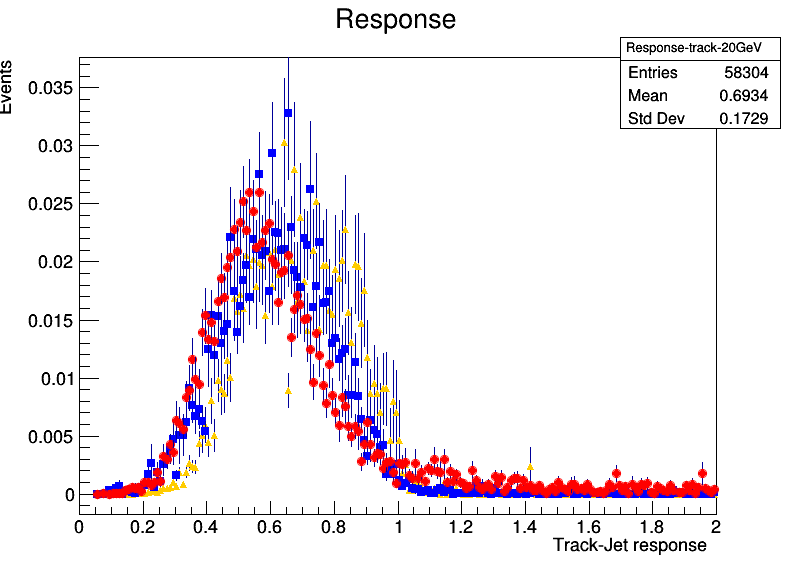

In [22]:
hist_response_track20->SetMarkerStyle(22);
hist_response_track20->SetMarkerColor(kOrange);
hist_response_track20->DrawNormalized("");
hist_response_track100->SetMarkerStyle(21);
hist_response_track100->SetMarkerColor(kBlue);
hist_response_track100->DrawNormalized("same");
hist_response_track1000->SetMarkerStyle(20);
hist_response_track1000->SetMarkerColor(kRed);
hist_response_track1000->DrawNormalized("same");
canvas5->Draw();

In [23]:
TCanvas *canvas6 = new TCanvas("Canvas6","",800,600);

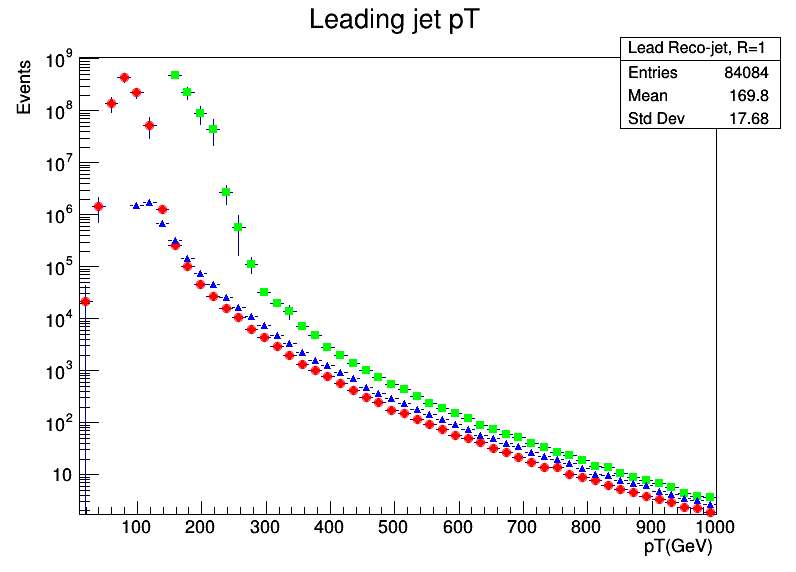

In [24]:
hist_leadreco10_pt->SetMarkerStyle(21);
hist_leadreco10_pt->SetMarkerColor(kGreen);
hist_leadreco10_pt->Draw();
hist_leadreco10Trim_pt->SetMarkerStyle(20);
hist_leadreco10Trim_pt->SetMarkerColor(kRed);
hist_leadreco10Trim_pt->Draw("same");
hist_leadtruth10_pt->SetMarkerStyle(22);
hist_leadtruth10_pt->SetMarkerColor(kBlue);
hist_leadtruth10_pt->Draw("same");
canvas6->SetLogy();
canvas6->Draw();

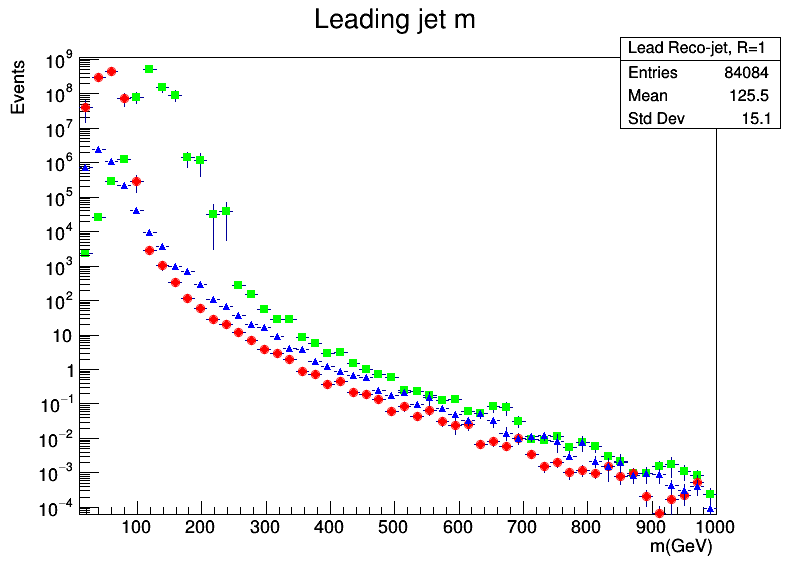

In [25]:
hist_leadreco10_m->SetMarkerStyle(21);
hist_leadreco10_m->SetMarkerColor(kGreen);
hist_leadreco10_m->Draw();
hist_leadreco10Trim_m->SetMarkerStyle(20);
hist_leadreco10Trim_m->SetMarkerColor(kRed);
hist_leadreco10Trim_m->Draw("same");
hist_leadtruth10_m->SetMarkerStyle(22);
hist_leadtruth10_m->SetMarkerColor(kBlue);
hist_leadtruth10_m->Draw("same");
canvas6->SetLogy();
canvas6->Draw();

In [26]:
TCanvas *canvas10 = new TCanvas("Canvas10","",800,600);

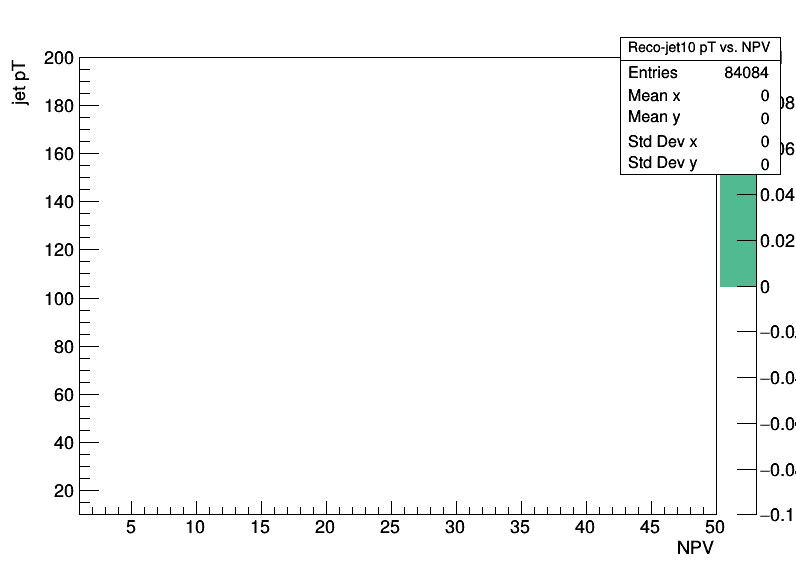

In [27]:
hist_jetpt10_npv->Draw("colz");
canvas10->Draw();

In [28]:
TCanvas *canvas11 = new TCanvas("Canvas11","",800,600);

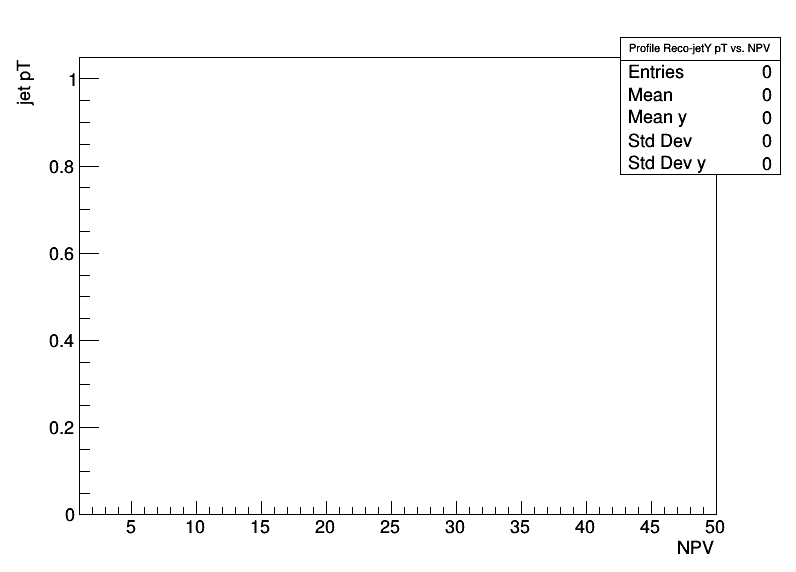

In [29]:
prof_jetptT_npv->Draw("");
canvas11->Draw();